In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import ast

2023-03-26 14:56:41.795119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_3 = pd.read_csv('df_3.csv')
df_4 = pd.read_csv('df_4.csv')
LOL_data = pd.concat([df_3, df_4])
LOL_data  = LOL_data.reset_index(drop=True)
LOL_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
LOL_data.head(15)

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,teamPosition,tier,top_champs_overall,wins,losses,winPct,veteran,freshBlood,hotStreak,win
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,TOP,GRANDMASTER,"['JarvanIV', 'LeeSin', 'Renekton']",131.0,118.0,0.526104,False,False,False,False
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,JUNGLE,GRANDMASTER,"['JarvanIV', 'Elise', 'Camille']",377.0,360.0,0.511533,False,True,False,False
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,MIDDLE,GRANDMASTER,"['Cassiopeia', 'Yasuo', 'Zed']",70.0,55.0,0.560000,False,True,True,False
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,BOTTOM,GRANDMASTER,"['Shaco', 'Khazix', 'Ekko']",176.0,167.0,0.513120,False,True,False,False
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,UTILITY,DIAMOND,"['Zilean', 'Evelynn', 'Soraka']",97.0,85.0,0.532967,False,True,False,False
5,0,KSante,Sylas,Yasuo,Jhin,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,TOP,DIAMOND,"['Darius', 'Aatrox', 'Mordekaiser']",8.0,4.0,0.666667,False,False,False,False
6,1,Sylas,KSante,Yasuo,Jhin,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,JUNGLE,MASTER,"['LeeSin', 'Graves', 'Gangplank']",49.0,38.0,0.563218,False,False,False,False
7,2,Yasuo,KSante,Sylas,Jhin,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,MIDDLE,CHALLENGER,"['Irelia', 'Yasuo', 'Akali']",108.0,90.0,0.545455,False,False,False,False
8,3,Jhin,KSante,Sylas,Yasuo,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,BOTTOM,GRANDMASTER,"['Sylas', 'Kindred', 'Graves']",142.0,133.0,0.516364,False,False,False,False
9,4,Blitzcrank,KSante,Sylas,Yasuo,Jhin,Quinn,Shaco,Cassiopeia,Kaisa,...,UTILITY,GRANDMASTER,"['Darius', 'Renekton', 'Blitzcrank']",131.0,118.0,0.526104,True,False,False,False


In [3]:
LOL_data.head(10).iloc[:, -10:]

,teamPosition,tier,top_champs_overall,wins,losses,winPct,veteran,freshBlood,hotStreak,win
0,TOP,GRANDMASTER,"['JarvanIV', 'LeeSin', 'Renekton']",131.0,118.0,0.526104,False,False,False,False
1,JUNGLE,GRANDMASTER,"['JarvanIV', 'Elise', 'Camille']",377.0,360.0,0.511533,False,True,False,False
2,MIDDLE,GRANDMASTER,"['Cassiopeia', 'Yasuo', 'Zed']",70.0,55.0,0.560000,False,True,True,False
3,BOTTOM,GRANDMASTER,"['Shaco', 'Khazix', 'Ekko']",176.0,167.0,0.513120,False,True,False,False
4,UTILITY,DIAMOND,"['Zilean', 'Evelynn', 'Soraka']",97.0,85.0,0.532967,False,True,False,False
5,TOP,DIAMOND,"['Darius', 'Aatrox', 'Mordekaiser']",8.0,4.0,0.666667,False,False,False,False
6,JUNGLE,MASTER,"['LeeSin', 'Graves', 'Gangplank']",49.0,38.0,0.563218,False,False,False,False
7,MIDDLE,CHALLENGER,"['Irelia', 'Yasuo', 'Akali']",108.0,90.0,0.545455,False,False,False,False
8,BOTTOM,GRANDMASTER,"['Sylas', 'Kindred', 'Graves']",142.0,133.0,0.516364,False,False,False,False
9,UTILITY,GRANDMASTER,"['Darius', 'Renekton', 'Blitzcrank']",131.0,118.0,0.526104,True,False,False,False


In [4]:
LOL_data.shape

(7200, 21)

In [5]:
## keep first 5 rows for every 10 rows, where teammates are grouped in the first 5 columns 
# LOL_data = LOL_data[LOL_data['Index'] % 10 < 5]
# LOL_data.reset_index(drop=True, inplace=True)

In [6]:
LOL_data.shape

(7200, 21)

In [7]:
## filter out rows where top 3 champions are not given
for index,row in enumerate(LOL_data["top_champs_overall"]):
    if len(ast.literal_eval(row)) != 3:
            LOL_data.drop(index, inplace=True)

In [8]:
LOL_data.shape

(7027, 21)

#If each match involves 10 players and 162 champions, then your player input array would have shape (801, 10, num_player_features) and your champion input array would have shape (801, 162, num_champion_features).

In [9]:
# filter the DataFrame to get rid of the rows with NaN values
LOL_data = LOL_data.dropna(how='any')

# reset the index of the DataFrame
LOL_data = LOL_data.reset_index(drop=True)


In [10]:
LOL_data.shape

(5943, 21)

In [11]:
LOL_data_copy = LOL_data.copy()

## Encode champions

In [12]:
# split top 3 champions column into separate columns
participants=[]
for row in LOL_data["top_champs_overall"]:
    participants_row={}
    ##the original columnn is of string type so I need to unstring it
    champ1, champ2, champ3 = ast.literal_eval(row)
    participants_row['topchamp1'] = champ1
    participants_row['topchamp2'] = champ2
    participants_row['topchamp3'] = champ3
    participants.append(participants_row)


# participants = [
#     {
#         'topchamp1': champ1,
#         'topchamp2': champ2,
#         'topchamp3': champ3
#     }
#     for champ1, champ2, champ3 in map(ast.literal_eval, LOL_data["top_champs_overall"])
# ]

# Create a new data frame with the participants list
participants_df = pd.DataFrame(participants)

# Concatenate the original data frame with the participants data frame
LOL_data = pd.concat([LOL_data, participants_df], axis=1)


### old part

In [13]:

champion_data = pd.read_csv('riot_champion.csv')
champion_data.head()

def add_newchamp(newchamps,championID):
  count = 0
  for champ in newchamps:
   if champ not in championID:
      championID.append(champ)
      count+=1
  championID.sort()
  ##returns number of new champions added
  return (str(count) + " champions have been added")

def create_dict(championID):
  ##creates a dictionary of champions and their corresponding ID
  return dict(zip(list(range(len(championID))),championID))

## adds new champs to our current list
newchamps = ['Aphelios','Lillia','Yone','Samira','Seraphine',
             'Sett','Rell','Akshan','Gwen','Vex','Viego',"Belveth","KSante",'Nilah','Zeri',"Renata"]
championID = pd.Series.tolist(champion_data.id)
add_newchamp(newchamps,championID)

'14 champions have been added'

In [14]:
## combine the list and index to a champion dictionary
champ_dict = create_dict(championID)
champ_dict.items()

dict_items([(0, 'Aatrox'), (1, 'Ahri'), (2, 'Akali'), (3, 'Akshan'), (4, 'Alistar'), (5, 'Amumu'), (6, 'Anivia'), (7, 'Annie'), (8, 'Aphelios'), (9, 'Ashe'), (10, 'AurelionSol'), (11, 'Azir'), (12, 'Bard'), (13, 'Belveth'), (14, 'Blitzcrank'), (15, 'Brand'), (16, 'Braum'), (17, 'Caitlyn'), (18, 'Camille'), (19, 'Cassiopeia'), (20, 'Chogath'), (21, 'Corki'), (22, 'Darius'), (23, 'Diana'), (24, 'DrMundo'), (25, 'Draven'), (26, 'Ekko'), (27, 'Elise'), (28, 'Evelynn'), (29, 'Ezreal'), (30, 'Fiddlesticks'), (31, 'Fiora'), (32, 'Fizz'), (33, 'Galio'), (34, 'Gangplank'), (35, 'Garen'), (36, 'Gnar'), (37, 'Gragas'), (38, 'Graves'), (39, 'Gwen'), (40, 'Hecarim'), (41, 'Heimerdinger'), (42, 'Illaoi'), (43, 'Irelia'), (44, 'Ivern'), (45, 'Janna'), (46, 'JarvanIV'), (47, 'Jax'), (48, 'Jayce'), (49, 'Jhin'), (50, 'Jinx'), (51, 'KSante'), (52, 'Kaisa'), (53, 'Kalista'), (54, 'Karma'), (55, 'Karthus'), (56, 'Kassadin'), (57, 'Katarina'), (58, 'Kayle'), (59, 'Kayn'), (60, 'Kennen'), (61, 'Khazix'), (6

In [15]:

def get_ID(champion): 
    if champion in champ_dict.values():
        for ID in champ_dict.items():
            if ID[1] == champion:
                return ID[0]
    if champion not in champ_dict.values():
        print('cannot find ' + str(champion))
                
# LOL_data["champion_encoded"] = LOL_data["champion"].apply(get_ID)
# LOL_data["champion1_encoded"] = LOL_data["champion1"].apply(get_ID)
# LOL_data["champion2_encoded"] = LOL_data["champion2"].apply(get_ID)
# LOL_data["champion3_encoded"] = LOL_data["champion3"].apply(get_ID)
# LOL_data["champion4_encoded"] = LOL_data["champion4"].apply(get_ID)
# LOL_data["champion5_encoded"] = LOL_data["champion5"].apply(get_ID)
# LOL_data["champion6_encoded"] = LOL_data["champion6"].apply(get_ID)
# LOL_data["champion7_encoded"] = LOL_data["champion7"].apply(get_ID)
# LOL_data["champion8_encoded"] = LOL_data["champion8"].apply(get_ID)
# LOL_data["champion9_encoded"] = LOL_data["champion9"].apply(get_ID)

columns_to_encode = ["champion", "champion1", "champion2", "champion3", "champion4","champion5", "champion6","champion7", "champion8","champion9",'topchamp1','topchamp2','topchamp3']
for col in columns_to_encode:
    LOL_data[f"{col}_encoded"] = LOL_data[col].apply(get_ID)



LOL_data.columns

Index(['Index', 'champion', 'champion1', 'champion2', 'champion3', 'champion4',
       'champion5', 'champion6', 'champion7', 'champion8', 'champion9',
       'teamPosition', 'tier', 'top_champs_overall', 'wins', 'losses',
       'winPct', 'veteran', 'freshBlood', 'hotStreak', 'win', 'topchamp1',
       'topchamp2', 'topchamp3', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded'],
      dtype='object')

### added part here 

In [16]:
champion_df = pd.read_csv('champ_info.csv')
champion_df.columns

Index(['Unnamed: 0', 'id', 'key', 'title', 'blurb', 'attack', 'defense',
       'magic', 'difficulty', 'tags', 'partype', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner', 'Counters', 'Countered_by'],
      dtype='object')

In [17]:
# create champion dictionary 
champ_dict = dict((champ, index) for index, champ in enumerate(champion_df['id']))
key_to_name = dict((index, champ) for index, champ in enumerate(champion_df['id']))

In [18]:
# encode champions in LOL_data
columns_to_encode = ["champion", "champion1", "champion2", "champion3", "champion4","champion5", "champion6","champion7", "champion8","champion9",'topchamp1','topchamp2','topchamp3']
for col in columns_to_encode:
    LOL_data[f"{col}_encoded"] = LOL_data[col].apply(lambda x: champ_dict[x] if x in champ_dict else -1)

In [19]:
LOL_data.head()

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,champion3_encoded,champion4_encoded,champion5_encoded,champion6_encoded,champion7_encoded,champion8_encoded,champion9_encoded,topchamp1_encoded,topchamp2_encoded,topchamp3_encoded
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,29,9,96,85,144,137,140,46,66,102
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,29,9,96,85,144,137,140,46,27,18
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,29,9,96,85,144,137,140,19,151,156
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,19,9,96,85,144,137,140,112,60,26
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,19,29,96,85,144,137,140,159,28,120


In [20]:
LOL_data.shape

(5943, 37)

In [21]:
# preprocess champion df
champion_df = champion_df.drop(columns=['Unnamed: 0','key','title', 'blurb', 'attack', 'defense',
       'magic','partype','crit', 'critperlevel'])

In [22]:
champion_df.head(10).iloc[:, -10:]

,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner,Counters,Countered_by
0,1.00,0.0,0.00,60,5.00,2.500,0.651,Rammus,Nasus,Kled
1,0.60,8.0,0.80,53,3.00,2.000,0.668,Maokai,Veigar,Diana
2,0.90,50.0,0.00,62,3.30,3.200,0.625,Pantheon,Diana,Fiora
3,0.65,8.2,0.70,52,3.50,4.000,0.638,Amumu,Talon,Yasuo
4,0.85,8.5,0.80,62,3.75,2.125,0.625,Kindred,Pyke,Renata
5,0.85,7.4,0.55,53,3.80,2.180,0.736,Akshan,Yuumi,Rell
6,0.55,8.0,0.80,51,3.20,1.680,0.625,Bard,Azir,Zoe
7,0.55,8.0,0.80,50,2.65,1.360,0.579,Vi,Yasuo,Yasuo
8,0.55,6.5,0.40,55,3.00,2.100,0.640,Sona,Kaisa,Twitch
9,0.55,7.0,0.65,59,2.95,3.330,0.658,Nilah,Yuumi,Rell


In [23]:
champion_df_copy = champion_df.copy()

In [24]:
# Check for NaN values
nan_df = champion_df.isna()

# Identify the rows that contain at least one NaN value
has_nan = nan_df.any(axis=1)

# Print the rows that contain NaN values
print(champion_df[has_nan])

Empty DataFrame
Columns: [id, difficulty, tags, hp, hpperlevel, mp, mpperlevel, movespeed, armor, armorperlevel, spellblock, spellblockperlevel, attackrange, hpregen, hpregenperlevel, mpregen, mpregenperlevel, attackdamage, attackdamageperlevel, attackspeedperlevel, attackspeed, Best_Partner, Counters, Countered_by]
Index: []

[0 rows x 24 columns]


In [25]:
from sklearn.preprocessing import LabelEncoder
import pickle

def save_encoder(encoder, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(encoder, f)

def load_encoder(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

def encode_column(df, col_name):
    le = LabelEncoder()
    le.fit(df[col_name])
    df[col_name+'_encoded'] = le.transform(df[col_name])
    return le

# Encode columns in a loop
for col in ["tags"]:
    encode_column(champion_df, col)

In [26]:
columns_to_encode = ['Best_Partner', 'Counters', 'Countered_by','id']
for col in columns_to_encode:
    champion_df[f"{col}_encoded"] =champion_df[col].apply(lambda x: champ_dict[x] if x in champ_dict else -1)

In [27]:
champion_encoded = champion_df.drop(columns=['Best_Partner', 'Counters',
       'Countered_by', 'tags_encoded','tags'])
champion_encoded.head()

,id,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,...,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,id_encoded
0,Aatrox,4,650,114,0,0.0,345,38,4.45,32,...,0.0,0.0,60,5.00,2.500,0.651,98,82,62,0
1,Ahri,5,570,96,418,25.0,330,18,4.70,30,...,8.0,0.8,53,3.00,2.000,0.668,75,139,23,1
2,Akali,7,570,119,200,0.0,345,23,4.70,37,...,50.0,0.0,62,3.30,3.200,0.625,92,23,31,2
3,Akshan,0,630,104,350,40.0,330,26,4.20,30,...,8.2,0.7,52,3.50,4.000,0.638,5,126,151,3
4,Alistar,7,670,120,350,40.0,330,44,4.70,32,...,8.5,0.8,62,3.75,2.125,0.625,61,94,101,4


In [28]:
# Select the columns that you want to normalize or standardize
numerical_columns = ['difficulty', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed',
       'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel',
       'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen',
       'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed']

# Standardize the columns using the StandardScaler
scaler = StandardScaler()
champion_encoded[numerical_columns] = scaler.fit_transform(champion_encoded[numerical_columns])

# Normalize the columns using the MinMaxScaler
scaler = MinMaxScaler()
champion_encoded[numerical_columns] = scaler.fit_transform(champion_encoded[numerical_columns])

In [29]:
# assume champion_encoded is a Pandas DataFrame
champion_encoded.to_csv('champion_encoded.csv', index=False)
champion_encoded.head()


,id,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,...,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,id_encoded
0,Aatrox,0.4,0.839161,0.70,0.0000,0.000000,0.666667,0.700000,0.809091,0.588235,...,0.000,0.0,0.62500,1.00,0.416667,0.469333,98,82,62,0
1,Ahri,0.5,0.559441,0.34,0.0418,0.287356,0.166667,0.033333,0.854545,0.470588,...,0.160,0.8,0.40625,0.60,0.333333,0.514667,75,139,23,1
2,Akali,0.7,0.559441,0.80,0.0200,0.000000,0.666667,0.200000,0.854545,0.882353,...,1.000,0.0,0.68750,0.66,0.533333,0.400000,92,23,31,2
3,Akshan,0.0,0.769231,0.50,0.0350,0.459770,0.166667,0.300000,0.763636,0.470588,...,0.164,0.7,0.37500,0.70,0.666667,0.434667,5,126,151,3
4,Alistar,0.7,0.909091,0.82,0.0350,0.459770,0.166667,0.900000,0.854545,0.588235,...,0.170,0.8,0.68750,0.75,0.354167,0.400000,61,94,101,4


In [30]:
# join champion table to player table 
LOL_data['id'] = LOL_data['champion']
LOL_data = LOL_data.merge(champion_encoded, on='id', how='left')
LOL_data.drop(columns=['id', 'id_encoded'], inplace=True)
LOL_data.head()

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.411765,0.00,0.00,0.90625,0.83,0.458333,0.506667,121,64,76
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.352941,0.13,0.45,0.75000,0.68,0.416667,0.488000,120,61,76
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.117647,0.16,0.80,0.40625,0.60,0.250000,0.458667,89,141,74
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.294118,0.17,1.00,0.62500,0.50,0.416667,0.400000,127,158,130
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,0.176471,0.14,0.65,0.59375,0.59,0.555000,0.488000,86,154,100


In [31]:
LOL_data.keys()

Index(['Index', 'champion', 'champion1', 'champion2', 'champion3', 'champion4',
       'champion5', 'champion6', 'champion7', 'champion8', 'champion9',
       'teamPosition', 'tier', 'top_champs_overall', 'wins', 'losses',
       'winPct', 'veteran', 'freshBlood', 'hotStreak', 'win', 'topchamp1',
       'topchamp2', 'topchamp3', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded', 'difficulty', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner_encoded', 'Counters_encoded', 'Counter

In [32]:

# Encode columns in a loop
for col in ['teamPosition','tier','veteran', 'freshBlood', 'hotStreak','win']:
    le = encode_column(LOL_data, col)
    if col == 'teamPosition':
        save_encoder(le, 'teamPosition_encoder.pkl')


In [33]:
numerical_columns = ['wins', 'losses','winPct']

# Standardize the columns using the StandardScaler
scaler = StandardScaler()
LOL_data[numerical_columns] = scaler.fit_transform(LOL_data[numerical_columns])

# Normalize the columns using the MinMaxScaler
scaler = MinMaxScaler()
LOL_data[numerical_columns] = scaler.fit_transform(LOL_data[numerical_columns])

In [34]:
# Standardize the columns using the StandardScaler
scaler = StandardScaler()
LOL_data['winPct'] = scaler.fit_transform(LOL_data[['winPct']])

# Save the StandardScaler for the 'winPct' column
with open('winPct_standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Normalize the columns using the MinMaxScaler
scaler = MinMaxScaler()
LOL_data['winPct'] = scaler.fit_transform(LOL_data[['winPct']])

# Save the MinMaxScaler for the 'winPct' column
with open('winPct_minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [35]:
LOL_data.keys()

Index(['Index', 'champion', 'champion1', 'champion2', 'champion3', 'champion4',
       'champion5', 'champion6', 'champion7', 'champion8', 'champion9',
       'teamPosition', 'tier', 'top_champs_overall', 'wins', 'losses',
       'winPct', 'veteran', 'freshBlood', 'hotStreak', 'win', 'topchamp1',
       'topchamp2', 'topchamp3', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded', 'difficulty', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner_encoded', 'Counters_encoded', 'Counter

In [36]:
LOL_encoded = LOL_data.drop(columns=['Index','champion', 'champion1', 'champion2', 'champion3',
       'champion4', 'champion5', 'champion6', 'champion7', 'champion8',
       'champion9', 'teamPosition',  'top_champs_overall', 'win','topchamp1',
       'topchamp2', 'topchamp3','veteran', 'freshBlood', 'hotStreak','tier',])

In [37]:
LOL_encoded.keys()

Index(['wins', 'losses', 'winPct', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded', 'difficulty', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner_encoded', 'Counters_encoded', 'Countered_by_encoded',
       'teamPosition_encoded', 'tier_encoded', 'veteran_encoded',
       'freshBlood_encoded', 'hotStreak_encoded', 'win_encoded'],
      dtype='object')

In [38]:
LOL_encoded = LOL_encoded.astype({
    'topchamp1_encoded': int,
    'topchamp2_encoded': int,
    'topchamp3_encoded': int
})

In [39]:
LOL_encoded.head()

,wins,losses,winPct,champion_encoded,champion1_encoded,champion2_encoded,champion3_encoded,champion4_encoded,champion5_encoded,champion6_encoded,...,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,teamPosition_encoded,tier_encoded,veteran_encoded,freshBlood_encoded,hotStreak_encoded,win_encoded
0,0.282609,0.282297,0.491001,102,46,19,29,9,96,85,...,0.506667,121,64,76,3,4,0,0,0,0
1,0.817391,0.861244,0.475351,46,102,19,29,9,96,85,...,0.488000,120,61,76,1,4,0,1,0,0
2,0.150000,0.131579,0.527407,19,102,46,29,9,96,85,...,0.458667,89,141,74,2,4,0,1,1,0
3,0.380435,0.399522,0.477054,29,102,46,19,9,96,85,...,0.400000,127,158,130,0,4,0,1,0,0
4,0.208696,0.203349,0.498372,9,102,46,19,29,96,85,...,0.488000,86,154,100,4,2,0,1,0,0


In [40]:
##create y_train
y = LOL_encoded[['win_encoded']].copy()
y

,win_encoded
0,0
1,0
2,0
3,0
4,0
...,...
5938,0
5939,0
5940,0
5941,1


In [41]:
LOL_encoded = LOL_encoded.drop(columns=["win_encoded","champion_encoded"])

In [42]:
LOL_encoded.columns

Index(['wins', 'losses', 'winPct', 'champion1_encoded', 'champion2_encoded',
       'champion3_encoded', 'champion4_encoded', 'champion5_encoded',
       'champion6_encoded', 'champion7_encoded', 'champion8_encoded',
       'champion9_encoded', 'topchamp1_encoded', 'topchamp2_encoded',
       'topchamp3_encoded', 'difficulty', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'Best_Partner_encoded',
       'Counters_encoded', 'Countered_by_encoded', 'teamPosition_encoded',
       'tier_encoded', 'veteran_encoded', 'freshBlood_encoded',
       'hotStreak_encoded'],
      dtype='object')

In [43]:
LOL_encoded.shape[0]

5943

In [44]:
player_columns = [ 'wins', 'losses', 'champion1_encoded', 'champion2_encoded',
       'champion3_encoded', 'champion4_encoded', 'champion5_encoded',
       'champion6_encoded', 'champion7_encoded', 'champion8_encoded',
       'champion9_encoded', 'hotStreak_encoded','teamPosition_encoded','winPct','topchamp1_encoded', 'topchamp2_encoded',
       'topchamp3_encoded','tier_encoded', 'veteran_encoded', 'freshBlood_encoded',
       'hotStreak_encoded'
       ]
champ_columns = ['difficulty', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'Best_Partner_encoded',
       'Counters_encoded', 'Countered_by_encoded',]
player_df = LOL_encoded[player_columns]
champ_df = LOL_encoded[champ_columns]

In [45]:
player_columns = [   'champion1_encoded', 'champion2_encoded',
       'champion3_encoded', 'champion4_encoded', 'champion5_encoded',
       'champion6_encoded', 'champion7_encoded', 'champion8_encoded',
       'champion9_encoded', 'hotStreak_encoded','teamPosition_encoded','winPct'
       ]
champ_columns = ['difficulty', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'Best_Partner_encoded',
       'Counters_encoded', 'Countered_by_encoded']
player_df = LOL_encoded[player_columns]
champ_df = LOL_encoded[champ_columns]

The importance scores outputted by a Gradient Boosting Machine (GBM) represent the relative importance of each feature in the model. The importance scores are based on the reduction in the objective function (e.g. mean squared error) that is achieved by splitting on each feature. The more important a feature is, the more the objective function will be reduced by splitting on that feature.

The importance scores are normalized such that the sum of all importance scores is equal to 1.0. This allows for easy comparison of the relative importance of different features. For example, if Feature A has an importance score of 0.2 and Feature B has an importance score of 0.1, then we can conclude that Feature A is twice as important as Feature B.

In [46]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Load your data and split into features and target

X = np.concatenate((player_df, champ_df), axis=1)

# Train the GBM model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gbm.fit(X, y)

# Get the feature importances
feature_importances = gbm.feature_importances_

# Rank the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Print the ranked features and their importance scores
for i in sorted_idx:
    print(f"Feature {i}: {feature_importances[i]}")

/Users/Chenjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 8: 0.15724843576624295
Feature 6: 0.15234052677282034
Feature 5: 0.14187160657972175
Feature 4: 0.1297546482637366
Feature 7: 0.1147444182557084
Feature 0: 0.07950638443101783
Feature 3: 0.043967315572902566
Feature 1: 0.036764287063282546
Feature 11: 0.03524299469648256
Feature 2: 0.03086678902822597
Feature 9: 0.021762747520167432
Feature 32: 0.010843611145637764
Feature 14: 0.008801477254258585
Feature 31: 0.004884348766835382
Feature 27: 0.004284588663477696
Feature 33: 0.0038499821876517215
Feature 25: 0.003025609830734033
Feature 15: 0.0029134713590596947
Feature 16: 0.0026986141710894176
Feature 29: 0.0024924163849717787
Feature 17: 0.002384598503068525
Feature 19: 0.0022000845802712934
Feature 18: 0.002052493644594677
Feature 12: 0.0012436065208460468
Feature 30: 0.0011218503563923345
Feature 13: 0.0010537994616938219
Feature 20: 0.0009574084989588956
Feature 10: 0.0007416414642814827
Feature 22: 0.00033704434716271106
Feature 23: 1.799110765339537e-05
Feature 21: 1.309

In [47]:
merged_df = pd.DataFrame(X, columns=list(player_df.columns) + list(champ_df.columns))

# get the column names corresponding to the column indexes
column_names = merged_df.columns[sorted_idx]

# print the column names
print(column_names)

Index(['champion9_encoded', 'champion7_encoded', 'champion6_encoded',
       'champion5_encoded', 'champion8_encoded', 'champion1_encoded',
       'champion4_encoded', 'champion2_encoded', 'winPct', 'champion3_encoded',
       'hotStreak_encoded', 'Counters_encoded', 'hpperlevel',
       'Best_Partner_encoded', 'attackdamage', 'Countered_by_encoded',
       'mpregen', 'mp', 'mpperlevel', 'attackspeedperlevel', 'movespeed',
       'armorperlevel', 'armor', 'difficulty', 'attackspeed', 'hp',
       'spellblock', 'teamPosition_encoded', 'attackrange', 'hpregen',
       'spellblockperlevel', 'hpregenperlevel', 'mpregenperlevel',
       'attackdamageperlevel'],
      dtype='object')


In [48]:
merged_df.keys()

Index(['champion1_encoded', 'champion2_encoded', 'champion3_encoded',
       'champion4_encoded', 'champion5_encoded', 'champion6_encoded',
       'champion7_encoded', 'champion8_encoded', 'champion9_encoded',
       'hotStreak_encoded', 'teamPosition_encoded', 'winPct', 'difficulty',
       'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor',
       'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange',
       'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel',
       'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel',
       'attackspeed', 'Best_Partner_encoded', 'Counters_encoded',
       'Countered_by_encoded'],
      dtype='object')

In [49]:
print(player_df.shape)
print(champ_df.shape)
print(y.shape)

(5943, 12)
(5943, 22)
(5943, 1)


In [50]:
# # Assuming `player_data` is your original player data
# num_rows, num_cols = champion_encoded.shape

# # Randomly select 100 rows to add to the DataFrame
# sampled_rows =champion_encoded.sample(n=(LOL_encoded.shape[0]-162), replace=True)

# # Concatenate the sampled rows to the DataFrame
# champion_sampled = pd.concat([champion_encoded, sampled_rows], axis=0)

In [51]:
## split dataset to train, test, cross validation
player_train, player_ = train_test_split(player_df, train_size=0.40, shuffle=True, random_state=1)
champion_train, champion_ = train_test_split(champ_df, train_size=0.40, shuffle=True, random_state=1)
y_train, y_   = train_test_split(y,train_size=0.40, shuffle=True, random_state=1)
champion_cv,champion_test,player_cv, player_test, y_cv, y_test = train_test_split(champion_,player_, y_, test_size=0.50, random_state=1)
del champion_,player_, y_

In [52]:
player_train.head()

,champion1_encoded,champion2_encoded,champion3_encoded,champion4_encoded,champion5_encoded,champion6_encoded,champion7_encoded,champion8_encoded,champion9_encoded,hotStreak_encoded,teamPosition_encoded,winPct
3803,47,3,24,97,104,38,72,107,83,0,1,0.454701
4624,61,106,24,120,104,150,33,52,83,0,3,0.420842
2284,40,41,24,94,43,66,122,148,97,0,3,0.483505
2500,78,144,17,53,31,89,55,8,120,0,3,0.686728
1782,36,66,24,83,31,44,156,17,72,0,2,0.501454


In [53]:
champion_train.head()

,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,...,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded
3803,0.8,0.856643,0.40,0.0280,0.804598,0.500000,0.500000,0.763636,0.588235,0.655172,...,0.588235,0.140,0.8,0.56250,0.6,0.550000,0.568000,6,99,122
4624,0.4,0.699301,0.22,0.0280,0.482759,0.666667,0.400000,0.763636,0.588235,0.655172,...,0.470588,0.140,0.5,0.65625,0.6,0.375000,0.400000,19,104,62
2284,0.0,0.769231,0.50,0.0350,0.459770,0.166667,0.300000,0.763636,0.470588,0.137931,...,0.294118,0.164,0.7,0.37500,0.7,0.666667,0.434667,5,126,151
2500,0.6,0.909091,0.46,0.0345,0.459770,0.333333,0.366667,0.763636,0.470588,0.137931,...,0.176471,0.164,0.7,0.59375,0.4,0.300000,0.450667,99,37,103
1782,0.5,0.559441,0.34,0.0418,0.287356,0.166667,0.033333,0.854545,0.470588,0.137931,...,0.235294,0.160,0.8,0.40625,0.6,0.333333,0.514667,75,139,23


In [54]:
num_player_features = player_train.shape[1] 
num_champion_features = champion_train.shape[1] 

In [55]:
num_outputs = 32
tf.random.set_seed(1)
player_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
  tf.keras.layers.Dense(256, activation='relu',),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_outputs),
    ### END CODE HERE ###  
])

champion_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###     
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_outputs),
    ### END CODE HERE ###  
])
# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_player_features,))
vu = player_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_champion_features,))
vm = champion_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
tf.random.set_seed(1)
history=model.fit([player_train, champion_train],y_train,validation_data=([player_cv, champion_cv], y_cv), epochs=50, verbose=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           40352       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           42912       ['input_2[0][0]']                
                                                                                              

2023-03-26 14:56:51.689588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
75/75 [==============================] - 2s 5ms/step - loss: 0.6993 - accuracy: 0.5040 - val_loss: 0.6876 - val_accuracy: 0.5339
Epoch 2/50
75/75 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5385 - val_loss: 0.6839 - val_accuracy: 0.5395
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5482 - val_loss: 0.6876 - val_accuracy: 0.5379
Epoch 4/50
75/75 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5524 - val_loss: 0.6863 - val_accuracy: 0.5362
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5768 - val_loss: 0.6838 - val_accuracy: 0.5496
Epoch 6/50
75/75 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.5806 - val_loss: 0.6834 - val_accuracy: 0.5435
Epoch 7/50
75/75 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5923 - val_loss: 0.6851 - val_accuracy: 0.5384
Epoch 8/50
75/75 [==

In [56]:
# Save the model to a file
model.save('my_model.h5')

In [57]:
import os
print(os.getcwd())

/Users/Chenjunyu/Desktop/Work/Bruin sports Analytics/LoL recommendation system


In [58]:
# from graphviz import Digraph

# def visualize_network(model):
#     dot = Digraph(comment="Neural Network")
#     dot.attr(rankdir="LR")

#     for i, layer in enumerate(model.layers):
#         layer_id = f"layer_{i}"
#         layer_label = layer.__class__.__name__
#         if hasattr(layer, "units"):
#             layer_label += f"\n({layer.units})"
#         dot.node(layer_id, layer_label)

#         if i > 0:
#             dot.edge(f"layer_{i - 1}", layer_id)

#     return dot

# graph = visualize_network(model)
# graph.view()


In [59]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plot_model(model, to_file='/Users/Chenjunyu/Desktop/Work/Bruin sports Analytics/LoL recommendation system/model_plot.png', show_shapes=True, show_layer_names=True)


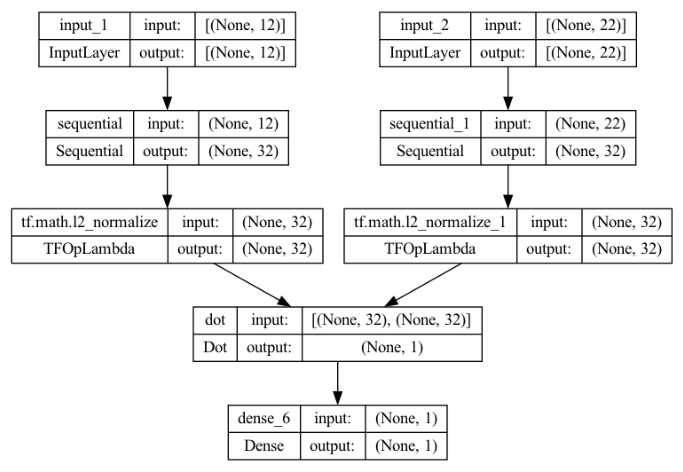

In [60]:
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

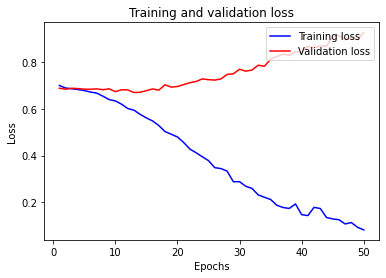

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the training and validation loss over time
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
#plt.savefig('training_validation_loss.png', dpi=300, bbox_inches='tight')
plt.show()


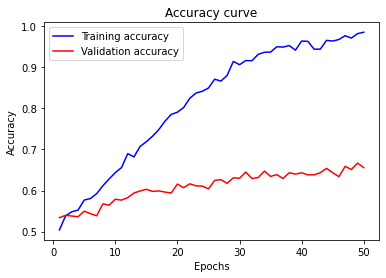

In [62]:
##accuracy curve

# Plot the training and validation accuracy over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


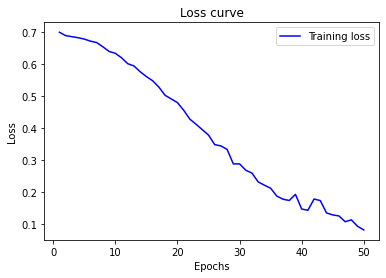

In [63]:

##the loss curve

# Plot the training and validation loss over time
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()

56/56 [==============================] - 0s 1ms/step


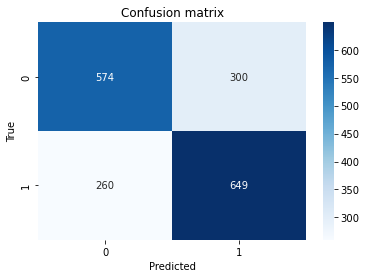

In [64]:


y_pred = model.predict([player_test, champion_test])
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



In the classification report, F1-score is a weighted average of precision and recall. It is a harmonic mean of precision and recall, with 1 as the best value and 0 as the worst value. The formula for calculating F1-score is:

F1-score = 2 * (precision * recall) / (precision + recall)

Support refers to the number of instances of each class in the actual data. It is the number of samples in the true positive (TP), false positive (FP), true negative (TN), and false negative (FN) categories, respectively.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.69      0.66      0.67       874
           1       0.68      0.71      0.70       909

    accuracy                           0.69      1783
   macro avg       0.69      0.69      0.69      1783
weighted avg       0.69      0.69      0.69      1783



In [66]:
# Convert the predicted and actual classes to a pandas Series
y_pred_series = pd.Series(y_pred_binary.flatten(), name='Predicted')
y_test_series = pd.Series(np.array(y_test).flatten(), name='Actual')

# Create the confusion matrix using the pandas crosstab function
confusion_matrix = pd.crosstab(y_test_series, y_pred_series, margins=True)

print(confusion_matrix)



Predicted    0    1   All
Actual                   
0          574  300   874
1          260  649   909
All        834  949  1783


In [67]:
# define the number of output units
num_outputs = 32

# create the player feature input and point to the player neural network
input_player = tf.keras.layers.Input(shape=(num_player_features,))
vu = tf.keras.layers.Dense(256, activation='relu')(input_player)
vu = tf.keras.layers.Dense(128, activation='relu')(vu)
vu = tf.keras.layers.Dense(num_outputs)(vu)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the champion feature input and point to the champion neural network
input_champion = tf.keras.layers.Input(shape=(num_champion_features,))
vm = tf.keras.layers.Dense(256, activation='relu')(input_champion)
vm = tf.keras.layers.Dense(128, activation='relu')(vm)
vm = tf.keras.layers.Dense(num_outputs)(vm)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

# specify the inputs and output of the model
model2 = tf.keras.Model([input_player, input_champion], output)
model2.summary()

# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
tf.random.set_seed(1)
model2.fit([player_train, champion_train], y_train, epochs=50, verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 256)          3328        ['input_3[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 256)          5888        ['input_4[0][0]']                
                                                                                            

In [68]:
model.evaluate([player_test, champion_test], y_test)

56/56 [==============================] - 0s 1ms/step - loss: 0.8452 - accuracy: 0.6859


[0.8451760411262512, 0.6859226226806641]

In [69]:
model2.evaluate([player_test, champion_test], y_test)

56/56 [==============================] - 0s 1ms/step - loss: 0.8309 - accuracy: 0.6652


[0.8309062719345093, 0.6651710867881775]

In [70]:
# join champion table to player table 
LOL_data_copy['id'] = LOL_data_copy['champion']
LOL_data_copy = LOL_data_copy.merge(champion_df_copy, on='id', how='left')
#LOL_data.drop(columns=['id', 'id_encoded'], inplace=True)
#LOL_data_copy.to_csv('LOL_data_copy.csv', index=False)
LOL_data_copy.head()

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner,Counters,Countered_by
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.75,0.0,0.00,69,4.15,2.75,0.665,Swain,KSante,MasterYi
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.70,6.5,0.45,64,3.40,2.50,0.658,Soraka,Kindred,MasterYi
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.50,8.0,0.80,53,3.00,1.50,0.647,Olaf,Vex,Malzahar
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.65,8.5,1.00,60,2.50,2.50,0.625,Taric,Ziggs,Tristana
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,0.55,7.0,0.65,59,2.95,3.33,0.658,Nilah,Yuumi,Rell


In [71]:
LOL_data_copy[["id","tags"]]

,id,tags
0,Renekton,"['Fighter', 'Tank']"
1,JarvanIV,"['Tank', 'Fighter']"
2,Cassiopeia,['Mage']
3,Ezreal,"['Marksman', 'Mage']"
4,Ashe,"['Marksman', 'Support']"
...,...,...
5938,Jhin,"['Marksman', 'Mage']"
5939,Taric,"['Support', 'Fighter']"
5940,Ahri,"['Mage', 'Assassin']"
5941,Varus,"['Marksman', 'Mage']"


In [72]:
LOL_data_copy.tags.unique()

array(["['Fighter', 'Tank']", "['Tank', 'Fighter']", "['Mage']",
       "['Marksman', 'Mage']", "['Marksman', 'Support']",
       "['Mage', 'Assassin']", "['Fighter', 'Assassin']",
       "['Assassin', 'Mage']", "['Marksman']", "['Tank', 'Mage']",
       "['Mage', 'Support']", "['Fighter', 'Marksman']", "['Support']",
       "['Assassin']", "['Assassin', 'Fighter']",
       "['Fighter', 'Support']", "['Support', 'Mage']",
       "['Mage', 'Fighter']", "['Marksman', 'Assassin']", "['Tank']",
       "['Fighter', 'Mage']", "['Mage', 'Marksman']",
       "['Tank', 'Support']", "['Fighter']", "['Support', 'Assassin']",
       "['Support', 'Fighter']", "['Support', 'Tank']"], dtype=object)

In [73]:
##replicate to 162 rows for prediction
sample  = player_test.sample()
test = np.array(sample)
test.shape
test_match = np.repeat(test.reshape(1, -1), champion_encoded.shape[0], axis=0)

##take the test sample's index and retrieve its unscaled form
sample = LOL_data_copy.loc[sample.index[0]]
sample_df = pd.DataFrame(sample).transpose()
##amplify the one row to 162 rows
repeated_df = pd.concat([sample_df] * 162, ignore_index=True)

##cleaning the dataframe
columns_to_drop = ['id', 'difficulty', 'tags', 'hp', 'hpperlevel', 'mp', 'mpperlevel',   'movespeed', 'armor', 'armorperlevel', 'spellblock',   'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',                   'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',   'attackspeedperlevel', 'attackspeed', 'Best_Partner', 'Counters','Countered_by']
repeated_df = repeated_df.drop(columns=columns_to_drop)
repeated_df = repeated_df.rename(columns={'champion': 'test_champion'})


In [74]:
# champ_df supposed to be 162 champs
prediction = model.predict([test_match, champion_encoded.iloc[:, 1:23]]) 
prediction

6/6 [==============================] - 0s 2ms/step


array([[0.48284188],
       [0.24926572],
       [0.19506302],
       [0.9365036 ],
       [0.88037676],
       [0.9317638 ],
       [0.89749646],
       [0.8119669 ],
       [0.6530626 ],
       [0.8018759 ],
       [0.47251728],
       [0.3361316 ],
       [0.9368221 ],
       [0.60899687],
       [0.8272166 ],
       [0.21415581],
       [0.10128548],
       [0.52276677],
       [0.55042464],
       [0.6702143 ],
       [0.29616526],
       [0.5589038 ],
       [0.71339566],
       [0.07717008],
       [0.8105739 ],
       [0.7372958 ],
       [0.9360989 ],
       [0.6853368 ],
       [0.3004062 ],
       [0.82822603],
       [0.71324044],
       [0.8876278 ],
       [0.35924798],
       [0.5462287 ],
       [0.7009199 ],
       [0.64284605],
       [0.5441765 ],
       [0.6135267 ],
       [0.31109533],
       [0.88055277],
       [0.47426957],
       [0.8539605 ],
       [0.7204076 ],
       [0.9132078 ],
       [0.34577113],
       [0.8447107 ],
       [0.4865438 ],
       [0.935

In [92]:
repeated_df

,Index,test_champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,teamPosition,tier,top_champs_overall,wins,losses,winPct,veteran,freshBlood,hotStreak,win
0,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
1,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
2,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
3,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
4,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
158,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
159,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False
160,1,Hecarim,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,...,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",236.0,210.0,0.529148,True,False,False,False


In [76]:
# sort the results, highest prediction first
sorted_index = np.argsort(-prediction,axis=0).reshape(-1).tolist()  #negate to get largest rating first
## sorted  percentage of winning
sorted_ypu   = prediction[sorted_index]
##sorted champion list from highest winning to lowest winning
sorted_champion  = champion_encoded.loc[sorted_index]
sorted_champion['Winning Rate'] = sorted_ypu
sorted_champion = pd.concat([sorted_champion, sorted_champion.reset_index(drop=True)], axis=1)
sorted_champion = sorted_champion.loc[:,~sorted_champion.columns.duplicated()]

In [77]:
sorted_champion.head()

,id,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,...,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,id_encoded,Winning Rate
131,Trundle,0.5,0.965035,0.62,0.0281,0.517241,0.833333,0.666667,0.709091,0.588235,...,0.60,0.8750,0.60,0.483333,0.333333,6,43,47,131,0.937093
12,Bard,0.9,0.769231,0.48,0.0350,0.574713,0.166667,0.566667,0.945455,0.470588,...,0.45,0.3750,0.60,0.333333,0.400000,6,109,120,12,0.936822
3,Akshan,0.0,0.769231,0.50,0.0350,0.459770,0.166667,0.300000,0.763636,0.470588,...,0.70,0.3750,0.70,0.666667,0.434667,5,126,151,3,0.936504
26,Ekko,0.8,0.856643,0.40,0.0280,0.804598,0.500000,0.500000,0.763636,0.588235,...,0.80,0.5625,0.60,0.550000,0.568000,6,99,122,26,0.936099
47,Jax,0.5,0.961538,0.40,0.0339,0.597701,0.833333,0.633333,0.763636,0.588235,...,0.70,0.8750,0.85,0.566667,0.434667,5,147,116,47,0.935800


In [78]:
## all the available teamPositions
LOL_data_copy.teamPosition.unique()

array(['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY'], dtype=object)

In [79]:
# Merge the dataframes based on the common column
merged_df = pd.merge(sorted_champion, LOL_data_copy, left_on='id', right_on='champion')

# Add the desired columns from LOL_data_copy to sorted_champion
sorted_champion[['difficulty', 'tags', 'hp', 'hpperlevel', 'mp', 'mpperlevel',
                 'movespeed', 'armor', 'armorperlevel', 'spellblock',
                 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
                 'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
                 'attackspeedperlevel', 'attackspeed', 'Best_Partner', 'Counters',
                 'Countered_by']] = merged_df[['difficulty_y', 'tags',
       'hp_y', 'hpperlevel_y', 'mp_y', 'mpperlevel_y', 'movespeed_y',
       'armor_y', 'armorperlevel_y', 'spellblock_y', 'spellblockperlevel_y',
       'attackrange_y', 'hpregen_y', 'hpregenperlevel_y', 'mpregen_y',
       'mpregenperlevel_y', 'attackdamage_y', 'attackdamageperlevel_y',
       'attackspeedperlevel_y', 'attackspeed_y', 'Best_Partner', 'Counters',
       'Countered_by']]
##Combine everything together and sort by winning rate
concatenated_df = pd.concat([repeated_df, sorted_champion], axis=1)
columns_to_drop = ['difficulty', 'hp', 'hpperlevel', 'mp', 'mpperlevel',  'movespeed', 'armor', 'armorperlevel', 'spellblock',  'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',  'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',                   'attackspeedperlevel', 'attackspeed']
concatenated_df = concatenated_df.drop(columns=columns_to_drop)
new_column_order = ['id', 'Winning Rate', 'tags', 'Best_Partner', 'Counters', 'Countered_by',  'champion1', 'champion2', 'champion3', 'champion4', 'champion5',  'champion6', 'champion7', 'champion8', 'champion9', 'teamPosition',   'tier', 'top_champs_overall', 'winPct']
concatenated_df = concatenated_df[new_column_order]
concatenated_df = concatenated_df.sort_values(by='Winning Rate', ascending=False)

In [80]:
concatenated_df.head(13)

,id,Winning Rate,tags,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct
131,Trundle,0.937093,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
12,Bard,0.936822,"['Support', 'Mage']",Anivia,Senna,Soraka,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
3,Akshan,0.936504,"['Fighter', 'Tank']",Anivia,Irelia,Jax,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
26,Ekko,0.936099,"['Marksman', 'Assassin']",Amumu,Talon,Yasuo,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
47,Jax,0.935800,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
146,Volibear,0.935475,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
87,Nocturne,0.933756,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
138,Vayne,0.932967,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
76,MasterYi,0.932760,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
94,Pyke,0.931776,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148


In [81]:
##Realizing that "tags" for the original dataset is inaccurate and limited
import requests
import pandas as pd

# Make a GET request to the Riot API to retrieve the champion data
url = 'http://ddragon.leagueoflegends.com/cdn/11.5.1/data/en_US/champion.json'
response = requests.get(url)
data = response.json()

# Create a DataFrame with the champion names and roles
champions = []
roles = []
for champion in sorted(data['data'].values(), key=lambda x: x['name']):
    champions.append(champion['name'])
    roles.append(', '.join(champion['tags']))
    
df = pd.DataFrame({'Champion': champions, 'Roles': roles})

# Print the DataFrame

#df.to_csv('df.csv', index=False)
print(df)


    Champion           Roles
0     Aatrox   Fighter, Tank
1       Ahri  Mage, Assassin
2      Akali        Assassin
3    Alistar   Tank, Support
4      Amumu      Tank, Mage
..       ...             ...
149      Zed        Assassin
150    Ziggs            Mage
151   Zilean   Support, Mage
152      Zoe   Mage, Support
153     Zyra   Mage, Support

[154 rows x 2 columns]


In [82]:
df.Roles.unique()

array(['Fighter, Tank', 'Mage, Assassin', 'Assassin', 'Tank, Support',
       'Tank, Mage', 'Mage, Support', 'Mage', 'Marksman',
       'Marksman, Support', 'Mage, Marksman', 'Support, Mage',
       'Tank, Fighter', 'Support, Tank', 'Fighter, Mage',
       'Assassin, Fighter', 'Mage, Fighter', 'Assassin, Mage',
       'Marksman, Mage', 'Fighter, Assassin', 'Fighter',
       'Fighter, Marksman', 'Fighter, Support', 'Support, Assassin',
       'Marksman, Assassin', 'Support', 'Tank', 'Support, Fighter'],
      dtype=object)

In [83]:
# Merge the DataFrames based on the 'Champion' column in df and the 'id' column in concatenated_df
merged_df = concatenated_df.merge(df, left_on='id', right_on='Champion', how='left')
merged_df = merged_df.drop(columns=['Champion'])

In [84]:
# Define a dictionary to map each champion ID to its role
champion_roles = {
    'Velkoz': 'Mage',
    'Chogath': 'Tank, Mage',
    'Nilah': 'Assassin, Mage',
    'KSante': 'Assassin',
    'Khazix': 'Assassin',
    'JarvanIV': 'Fighter, Tank',
    'RekSai': 'Fighter, Tank',
    'Kaisa': 'Marksman, Assassin',
    'Belveth': 'Fighter, Tank',
    'Leblanc': 'Assassin, Mage',
    'KogMaw': 'Marksman',
    'DrMundo': 'Fighter, Tank',
    'TwistedFate': 'Mage',
    'MissFortune': 'Marksman',
    'Zeri': 'Mage, Support',
    'Vex': 'Mage',
    'Akshan': 'Assassin, Marksman',
    'Gwen': 'Fighter',
    'LeeSin': 'Fighter',
    'Renata': 'Fighter, Tank',
    'Nunu': 'Tank, Mage',
    'MonkeyKing': 'Fighter',
    'MasterYi': 'Assassin',
    'XinZhao': 'Fighter, Assassin',
    'TahmKench': 'Tank, Support',
    'AurelionSol': 'Mage'
}

# Fill in the 'Roles' column based on the 'id' column
merged_df.loc[merged_df['id'].isin(champion_roles.keys()), 'Roles'] = merged_df['id'].map(champion_roles)


In [98]:
merged_df[merged_df['Roles']=="Assassin"]

,id,Winning Rate,tags,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct,Roles
8,MasterYi,0.932760,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin
63,Shaco,0.752509,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin
118,Khazix,0.316686,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin
121,Talon,0.304824,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin
123,KSante,0.302286,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin
141,Zed,0.241767,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin
152,Akali,0.195063,"['Fighter', 'Tank']",Anivia,Irelia,Jax,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,Assassin


In [85]:
unique_ids_with_nan_roles = merged_df[pd.isna(merged_df['Roles'])]['id'].unique()
print(unique_ids_with_nan_roles)


[]


In [86]:
import pandas as pd



# Define the roles for each team position
roles = {
    'TOP': ['Mage, Support', 'Mage', "Mage, Fighter",'Mage, Assassin', 'Assassin, Mage', 'Marksman, Mage', 'Marksman, Assassin', 'Support'],
    'JUNGLE': ['Mage, Assassin', 'Tank, Support', 'Tank, Mage', 'Mage, Support', 'Mage', 'Marksman', 'Marksman, Support', 'Mage, Marksman', 'Support, Mage', 'Support, Tank', 'Marksman, Mage', 'Support, Assassin', 'Marksman, Assassin', 'Support', 'Tank', 'Support, Fighter'],
    'MIDDLE': ["Support, Mage",'Fighter, Tank', 'Tank, Support', 'Marksman', 'Marksman, Support', 'Mage, Marksman', 'Support, Mage', 'Support, Tank', 'Marksman, Mage', 'Support, Assassin', 'Marksman, Assassin', 'Support', 'Tank', 'Support, Fighter', 'Tank, Mage'],
    'BOTTOM': ['Fighter, Tank', 'Mage, Assassin', 'Assassin', 'Tank, Support', 'Support, Mage', 'Tank, Fighter', 'Support, Tank', 'Fighter, Mage', 'Fighter, Assassin', 'Fighter', 'Support', 'Tank', 'Support, Fighter', 'Assassin, Fighter', 'Mage, Fighter', 'Assassin, Mage', 'Fighter, Support', 'Support, Assassin', 'Tank, Mage', 'Mage, Support', 'Mage'],
    'UTILITY': ['Fighter, Tank', 'Mage, Assassin', 'Assassin', 'Tank, Mage', 'Mage', 'Marksman', 'Tank, Fighter', 'Fighter, Mage', 'Assassin, Fighter', 'Mage, Fighter', 'Assassin, Mage', 'Marksman, Mage', 'Mage, Marksman', 'Fighter, Assassin', 'Fighter', 'Fighter, Marksman', 'Marksman, Assassin']
}

# Initialize an empty DataFrame to store the sorted rows
sorted_df = pd.DataFrame()

# Iterate through team positions and roles
for position, role_list in roles.items():
    # Filter rows based on team position and role
    in_role = merged_df[(merged_df['teamPosition'] == position) & (merged_df['Roles'].isin(role_list))]
    not_in_role = merged_df[(merged_df['teamPosition'] == position) & (~merged_df['Roles'].isin(role_list))]
    
    # Sort the in_role rows by 'Winning Rate'
    sorted_rows = in_role.sort_values(by='Winning Rate', ascending=False)
    
    # Concatenate the sorted_rows and not_in_role DataFrames
    position_df = pd.concat([not_in_role, sorted_rows], ignore_index=True)
    
    # Append the position_df to the sorted_df DataFrame
    sorted_df = pd.concat([sorted_df, position_df], ignore_index=True)

# Reset the index of the sorted DataFrame
sorted_df.reset_index(drop=True, inplace=True)



In [87]:
##construct the final dataframe that takes in consideration of the roles of the champion needed 
sorted_df.drop(columns=['tags'], inplace=True)
sorted_df = sorted_df[['id', 'Winning Rate', 'Roles', 'Best_Partner', 'Counters', 'Countered_by', 'champion1', 'champion2', 'champion3', 'champion4', 'champion5', 'champion6', 'champion7', 'champion8', 'champion9', 'teamPosition', 'tier', 'top_champs_overall', 'winPct']]
sorted_df = sorted_df.rename(columns={'id': 'champion_rec'})


In [88]:
sorted_df.head(10)

,champion_rec,Winning Rate,Roles,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct
0,Trundle,0.937093,"Fighter, Tank",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
1,Akshan,0.936504,"Assassin, Marksman",Anivia,Irelia,Jax,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
2,Ekko,0.936099,"Assassin, Fighter",Amumu,Talon,Yasuo,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
3,Jax,0.935800,"Fighter, Assassin",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
4,Volibear,0.935475,"Fighter, Tank",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
5,Nocturne,0.933756,"Assassin, Fighter",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
6,MasterYi,0.932760,Assassin,Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
7,Nasus,0.931161,"Fighter, Tank",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
8,Ornn,0.926715,"Tank, Fighter",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148
9,Malphite,0.925510,"Tank, Fighter",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148


In [89]:
merged_df

,id,Winning Rate,tags,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct,Roles
0,Trundle,0.937093,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Fighter, Tank"
1,Bard,0.936822,"['Support', 'Mage']",Anivia,Senna,Soraka,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Support, Mage"
2,Akshan,0.936504,"['Fighter', 'Tank']",Anivia,Irelia,Jax,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Assassin, Marksman"
3,Ekko,0.936099,"['Marksman', 'Assassin']",Amumu,Talon,Yasuo,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Assassin, Fighter"
4,Jax,0.935800,"['Assassin', 'Fighter']",Anivia,RekSai,Sylas,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Fighter, Assassin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Tryndamere,0.107845,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Fighter, Assassin"
158,Braum,0.101285,"['Support', 'Mage']",Anivia,Senna,Soraka,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Support, Tank"
159,Yone,0.093078,"['Fighter', 'Assassin']",Amumu,Warwick,Sion,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Assassin, Fighter"
160,Diana,0.077170,"['Marksman', 'Assassin']",Amumu,Talon,Yasuo,Aatrox,Viktor,Xayah,Karma,Gangplank,Sejuani,Sylas,Varus,Rakan,JUNGLE,CHALLENGER,"['Hecarim', 'Diana', 'Belveth']",0.529148,"Fighter, Mage"
